## Dataset: Ferguson et al. 2015

Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing.

Source of data: https://www.zenodo.org/record/17794#.W5j7lBQnYYM

In [1]:
#https://pypi.org/project/pyabf/
import pyabf

abf = pyabf.ABF("PYR1.abf") # read one data set
abf.setSweep(1) # sweeps start at 0
print(abf.sweepY) # sweep data (ADC)
print(abf.sweepX) # sweep times (seconds)

[-23.49853516 -25.02441406  -4.57763672 ..., -10.07080078 -15.25878906
 -10.07080078]
[  0.00000000e+00   5.00000000e-05   1.00000000e-04 ...,   9.99850000e-01
   9.99900000e-01   9.99950000e-01]


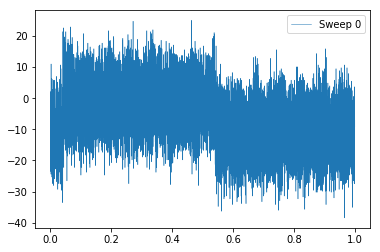

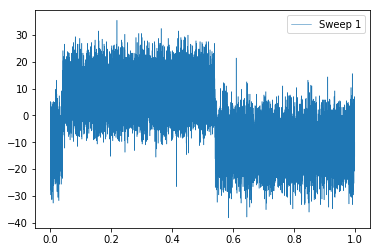

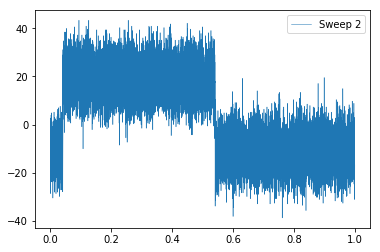

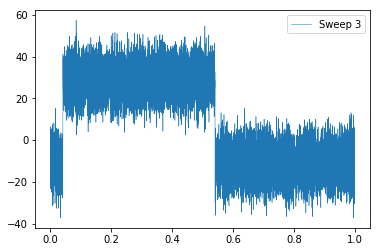

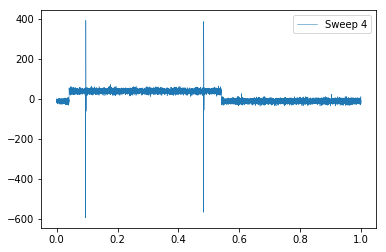

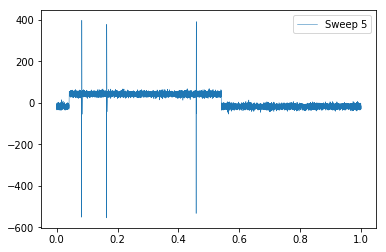

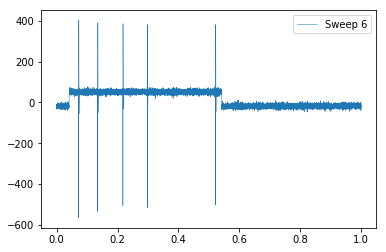

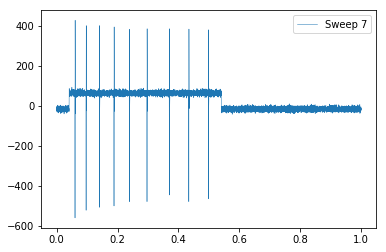

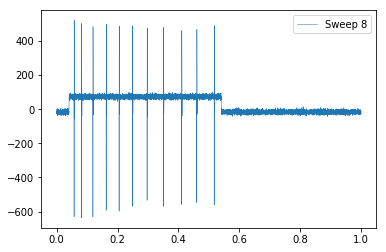

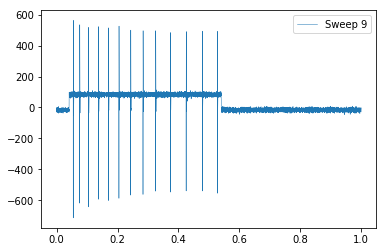

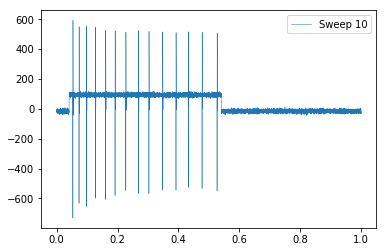

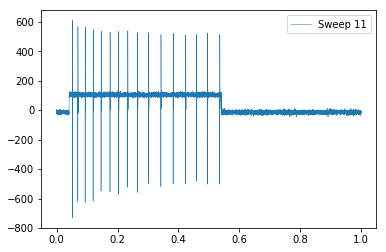

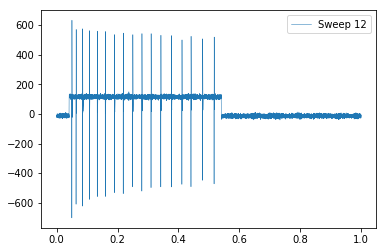

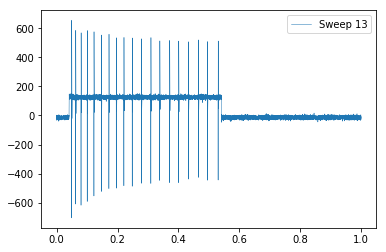

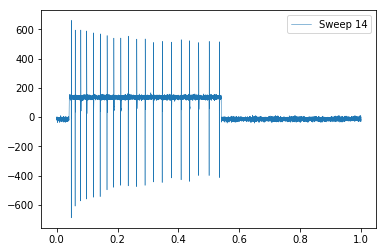

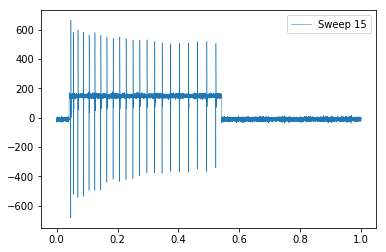

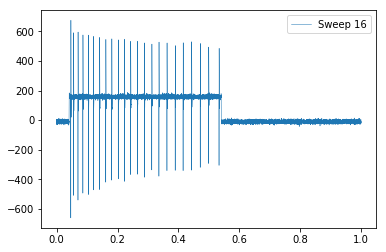

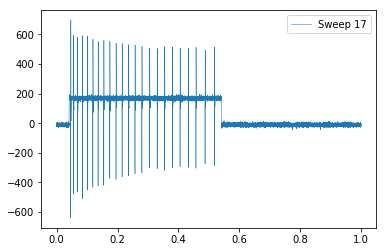

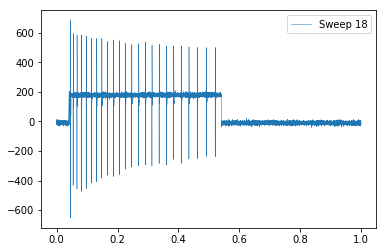

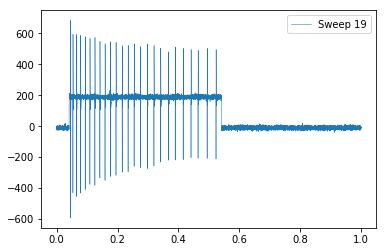

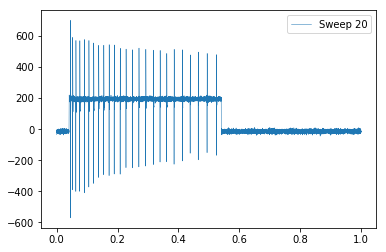

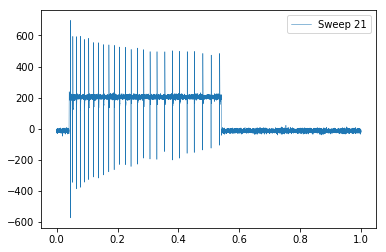

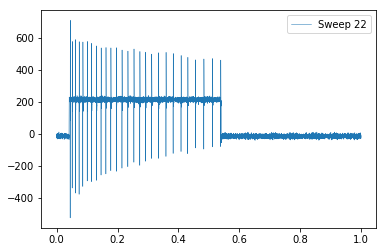

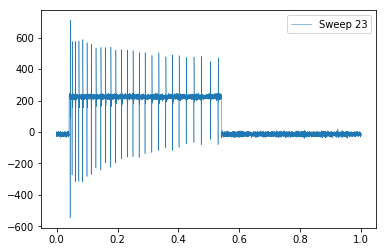

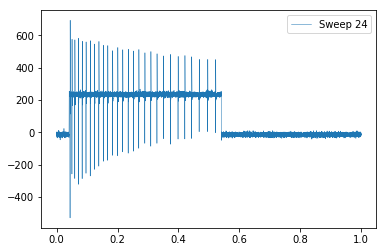

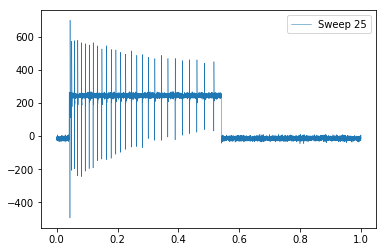

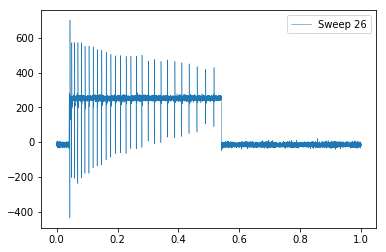

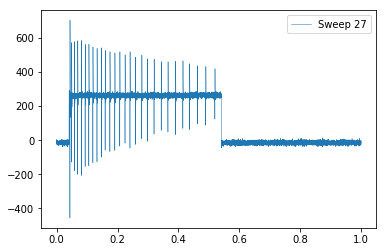

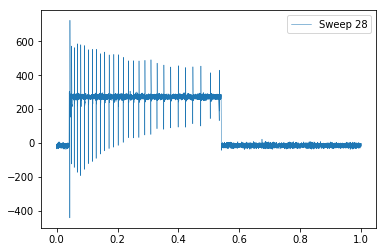

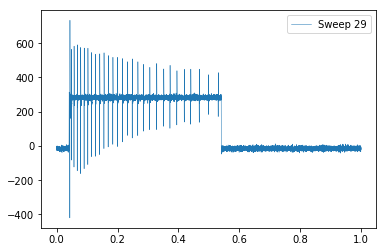

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

for i in range(30):
    
    abf.setSweep(i) # sweeps start at 0
    plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
    plt.legend()
    plt.show()
